## Analysis of the network
Using networksx

### Imports

In [1]:
import networkx as nx
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import powerlaw
from statistics import mean

### Defining G graph

In [2]:
# Importing the regular graph, for research question no. 1
basic_edges_df = pd.read_csv("basic_graph_edges.csv")
G = nx.from_pandas_edgelist(basic_edges_df,"Source","Target",create_using=nx.DiGraph)
# Importing the graphs of the events, for research question no. 2
G_events={"A":[],"B":[],"C":[]}
before2018_edges_df = pd.read_csv("20180401-20180501_edges.csv")
G_events["A"].append(nx.from_pandas_edgelist(before2018_edges_df,"Source","Target",create_using=nx.DiGraph))
after2018_edges_df = pd.read_csv("20180501-20180601_edges.csv")
G_events["A"].append(nx.from_pandas_edgelist(after2018_edges_df,"Source","Target",create_using=nx.DiGraph))
before2019_edges_df = pd.read_csv("20190901-20191001_edges.csv")
G_events["B"].append(nx.from_pandas_edgelist(before2019_edges_df,"Source","Target",create_using=nx.DiGraph))
after2019_edges_df = pd.read_csv("20191001-20191101_edges.csv")
G_events["B"].append(nx.from_pandas_edgelist(after2019_edges_df,"Source","Target",create_using=nx.DiGraph))
before2022_edges_df = pd.read_csv("20220101-20220201_edges.csv")
G_events["C"].append(nx.from_pandas_edgelist(before2022_edges_df,"Source","Target",create_using=nx.DiGraph))
after2022_edges_df = pd.read_csv("20220201-20220301_edges.csv")
G_events["C"].append(nx.from_pandas_edgelist(after2022_edges_df,"Source","Target",create_using=nx.DiGraph))

### Information about the graph

In [3]:
def info(G):
    print(nx.info(G))
print("Basic network:")
info(G)
print("\nBefore special events networks:")
for i in G_events:
    info(G_events[i][0])
print("\nAfter special events networks:")
for i in G_events:
    info(G_events[i][1])

Basic network:
DiGraph with 7583 nodes and 197415 edges

Before special events networks:
DiGraph with 721 nodes and 13957 edges
DiGraph with 735 nodes and 14228 edges
DiGraph with 749 nodes and 14564 edges

After special events networks:
DiGraph with 721 nodes and 13957 edges
DiGraph with 735 nodes and 14228 edges
DiGraph with 754 nodes and 14805 edges


### Diameter

In [4]:
def calc_diameter(G):
    return max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
print("Basic network diameter: " +str(calc_diameter(G)))
for i in G_events:
    str_to_print= "\nBefore event " + i +" network diameter: "
    print(str_to_print + str(calc_diameter(G_events[i][0])))
    str_to_print = "After event " + i + " network diameter: "
    print(str_to_print + str(calc_diameter(G_events[i][1])))

Basic network diameter: 9

Before event A network diameter: 6
After event A network diameter: 6

Before event B network diameter: 6
After event B network diameter: 6

Before event C network diameter: 6
After event C network diameter: 6


### Clustering Coefficient

In [5]:
def calc_c(G):
    clustering_coefficient = []
    for node in G.nodes():
        neighbours=[n for n in nx.neighbors(G,node)]
        n_neighbors=len(neighbours)
        n_links=0
        if n_neighbors>1:
            for node1 in neighbours:
                for node2 in neighbours:
                    if G.has_edge(node1,node2):
                        n_links+=1
            n_links/=2 #because n_links is calculated twice
            clustering_coefficient.append(n_links/(0.5*n_neighbors*(n_neighbors-1)))
        else:
            clustering_coefficient.append(0)
    return clustering_coefficient
C_G = calc_c(G)
print("Clustering Coefficient of the basic network (first 7): ")
print(C_G[:7])
C_G_events = {"A":[],"B":[],"C":[]}
for i in G_events:
    C_G_events[i].append(calc_c(G_events[i][0]))
    C_G_events[i].append(calc_c(G_events[i][1]))
for i in G_events:
    str_to_print= "\nBefore event " + i +" networks' clustering coefficient (first 7): "
    print(str_to_print)
    print(C_G_events[i][0][:7])
    str_to_print = "After event " + i + " networks' clustering coefficient (first 7): "
    print(str_to_print)
    print(C_G_events[i][0][:7])

Clustering Coefficient of the basic network (first 7): 
[0.024546015875495646, 0.17867867867867868, 0.12852112676056338, 0.2, 0.0777474816329622, 0.1408199643493761, 0.09761904761904762]

Before event A networks' clustering coefficient (first 7): 
[0.09974563953488372, 0.09768140832975526, 0.21306818181818182, 0.14789915966386555, 0.18095238095238095, 0.20212765957446807, 0.17234848484848486]
After event A networks' clustering coefficient (first 7): 
[0.09974563953488372, 0.09768140832975526, 0.21306818181818182, 0.14789915966386555, 0.18095238095238095, 0.20212765957446807, 0.17234848484848486]

Before event B networks' clustering coefficient (first 7): 
[0.09974563953488372, 0.09768140832975526, 0.21306818181818182, 0.14789915966386555, 0.18095238095238095, 0.20212765957446807, 0.17234848484848486]
After event B networks' clustering coefficient (first 7): 
[0.09974563953488372, 0.09768140832975526, 0.21306818181818182, 0.14789915966386555, 0.18095238095238095, 0.20212765957446807, 0.

calculating the average clustering coefficient

In [6]:
def c_avg(clustering_coefficient):
    return mean(clustering_coefficient)
print("Basic network average clustering coefficient: " +str(c_avg(C_G)))
for i in C_G_events:
    str_to_print = "\nThe average clustering coefficient of before the event " + i + " network: "
    print(str_to_print + str(c_avg(C_G_events[i][0])))
    str_to_print = "The average clustering coefficient of after the event " + i + " network: "
    print(str_to_print + str(c_avg(C_G_events[i][1])))

Basic network average clustering coefficient: 0.21148912609797446

The average clustering coefficient of before the event A network: 0.3034507955831256
The average clustering coefficient of after the event A network: 0.3034507955831256

The average clustering coefficient of before the event B network: 0.30416780638543456
The average clustering coefficient of after the event B network: 0.30416780638543456

The average clustering coefficient of before the event C network: 0.3034774956398211
The average clustering coefficient of after the event C network: 0.30305230663357124


### Average Shortest Path Length
waiting for forum

In [ ]:
average_shortest_path_length = nx.average_shortest_path_length(G)

### Degree Histogram
In log-log scale

In [7]:
def degree_hist(G,name=None):
    degree_hist = nx.degree_histogram(G)
    k_list = np.arange(0,len(degree_hist))
    plt.scatter(np.log(k_list),np.log(degree_hist),label=name)

The basic network:

c:\Users\yumi4\wikipedia-usage-network\venv\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Basic Network')

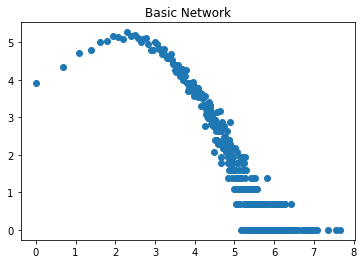

In [8]:
degree_hist(G)
plt.title("Basic Network")

The special events networks:

c:\Users\yumi4\wikipedia-usage-network\venv\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


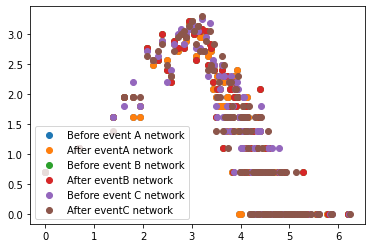

In [9]:
for i in G_events:
    name = "Before event " + i + " network"
    degree_hist(G_events[i][0],name)
    plt.legend()
    name = "After event" + i + " network"
    degree_hist(G_events[i][1],name)
    plt.legend()

As we can see, in the both of the plots, there is somewhat of a linear trend.

In [10]:
def degree_seq(G):
    degree_sequence = sorted([d for n,d in G.degree()],reverse=True)
    plt.plot(degree_sequence)
    return degree_sequence

### Degree Ploting

Basic network:

Text(0.5, 1.0, 'Basic network')

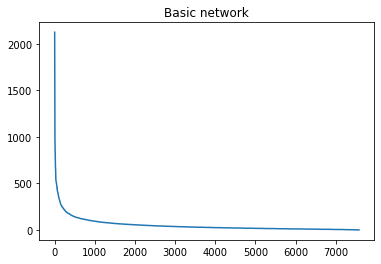

In [11]:
DS_G=degree_seq(G)
plt.title("Basic network")

Special events networks:

c:\Users\yumi4\wikipedia-usage-network\venv\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


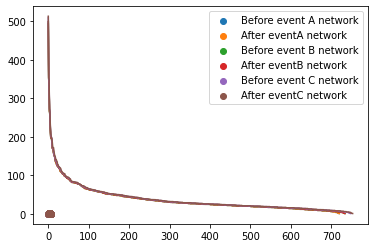

In [12]:
DS_G_events = {"A":[],"B":[],"C":[]}
for i in G_events:
    DS_G_events[i].append(degree_seq(G_events[i][0]))
    name = "Before event " + i + " network"
    degree_hist(G_events[i][0],name)
    plt.legend()
    DS_G_events[i].append(degree_seq(G_events[i][1]))
    name = "After event" + i + " network"
    degree_hist(G_events[i][1],name)
    plt.legend()

As we can see, the wikipedia networks is has a power law degree distribution, that indicates that this network is a Scale Free network.

In [13]:
def degree_fig(degree_sequence,name="None"):
    figPDF = powerlaw.plot_pdf(degree_sequence,label=name)
    figPDF.set_ylabel(r"p(k)")
    figPDF.set_xlabel(r"k")

Text(0.5, 1.0, 'Basic network')

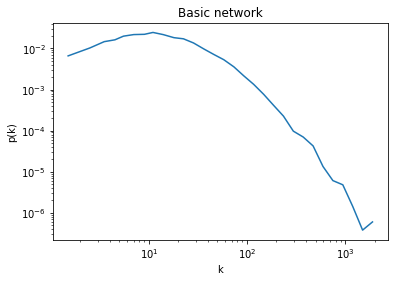

In [14]:
degree_fig(DS_G)
plt.title("Basic network")

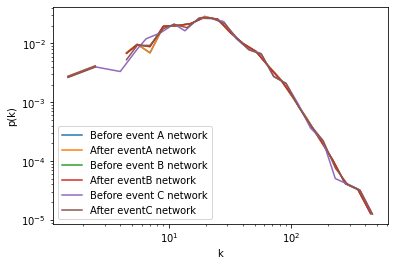

In [15]:
for i in G_events:
    name = "Before event " + i + " network"
    degree_fig(DS_G_events[i][0],name)
    plt.legend()
    name = "After event" + i + " network"
    degree_fig(DS_G_events[i][1],name)
    plt.legend()

### Fitting power law disribution to our networks

In [16]:
def power_law_fit(degree_sequence):
    fit = powerlaw.Fit(degree_sequence,discrete=True)
    gamma = fit.power_law.alpha
    print("gamma=",gamma)

Basic network:

In [17]:
power_law_fit(DS_G)

Calculating best minimal value for power law fit
gamma= 2.791599440301634


The special events networks:

In [18]:
for i in DS_G_events:
    str_to_print = "Before event " + i + " network:"
    print(str_to_print)
    power_law_fit(DS_G_events[i][0])
    str_to_print = "After event " + i + " network:"
    print(str_to_print)
    power_law_fit(DS_G_events[i][1])
    print()

Before event A network:
Calculating best minimal value for power law fit
gamma= 3.503087888190243
After event A network:
Calculating best minimal value for power law fit
gamma= 3.503087888190243

Before event B network:
Calculating best minimal value for power law fit
gamma= 3.4999428102809116
After event B network:
Calculating best minimal value for power law fit
gamma= 3.4999428102809116

Before event C network:
Calculating best minimal value for power law fit
gamma= 3.4891634663012927
After event C network:
Calculating best minimal value for power law fit
gamma= 3.41820049828424

